In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np

print("Bùi Hoàn Duy - 6351071012")

# Load dataset
data = pd.read_csv("dataset/mushrooms.csv")

print(data.head())
print(data.info())


Bùi Hoàn Duy - 6351071012
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w       

Câu 4

In [4]:
print("Bùi Hoàn Duy - 6351071012")

X = data.drop('class', axis=1)   # features
y = data['class']                # label

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Bùi Hoàn Duy - 6351071012
Shape X: (8124, 22)
Shape y: (8124,)


Câu 5

In [5]:
print("Bùi Hoàn Duy - 6351071012")

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

print("Shape sau khi One-hot:", X_encoded.shape)


Bùi Hoàn Duy - 6351071012
Shape sau khi One-hot: (8124, 117)


Câu 6

In [6]:
print("Bùi Hoàn Duy - 6351071012")

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Bùi Hoàn Duy - 6351071012
X_train: (5686, 117)
X_test : (2438, 117)
y_train: (5686,)
y_test : (2438,)


Câu 7

In [7]:
print("Bùi Hoàn Duy - 6351071012")

clf_id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)

id3_pred = clf_id3.predict(X_test)

id3_acc = accuracy_score(y_test, id3_pred)
print("ID3 Accuracy:", id3_acc)
print(classification_report(y_test, id3_pred))


Bùi Hoàn Duy - 6351071012
ID3 Accuracy: 1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



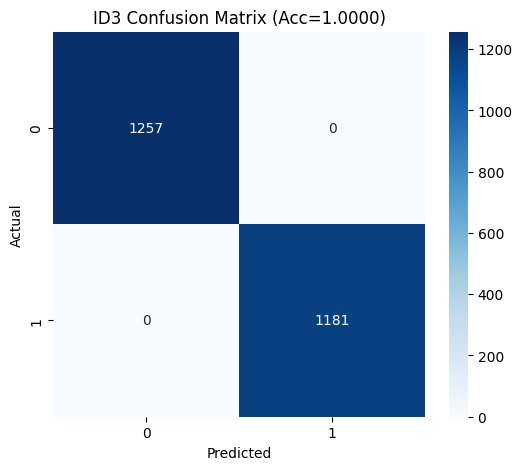

In [8]:
cm = confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"ID3 Confusion Matrix (Acc={id3_acc:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


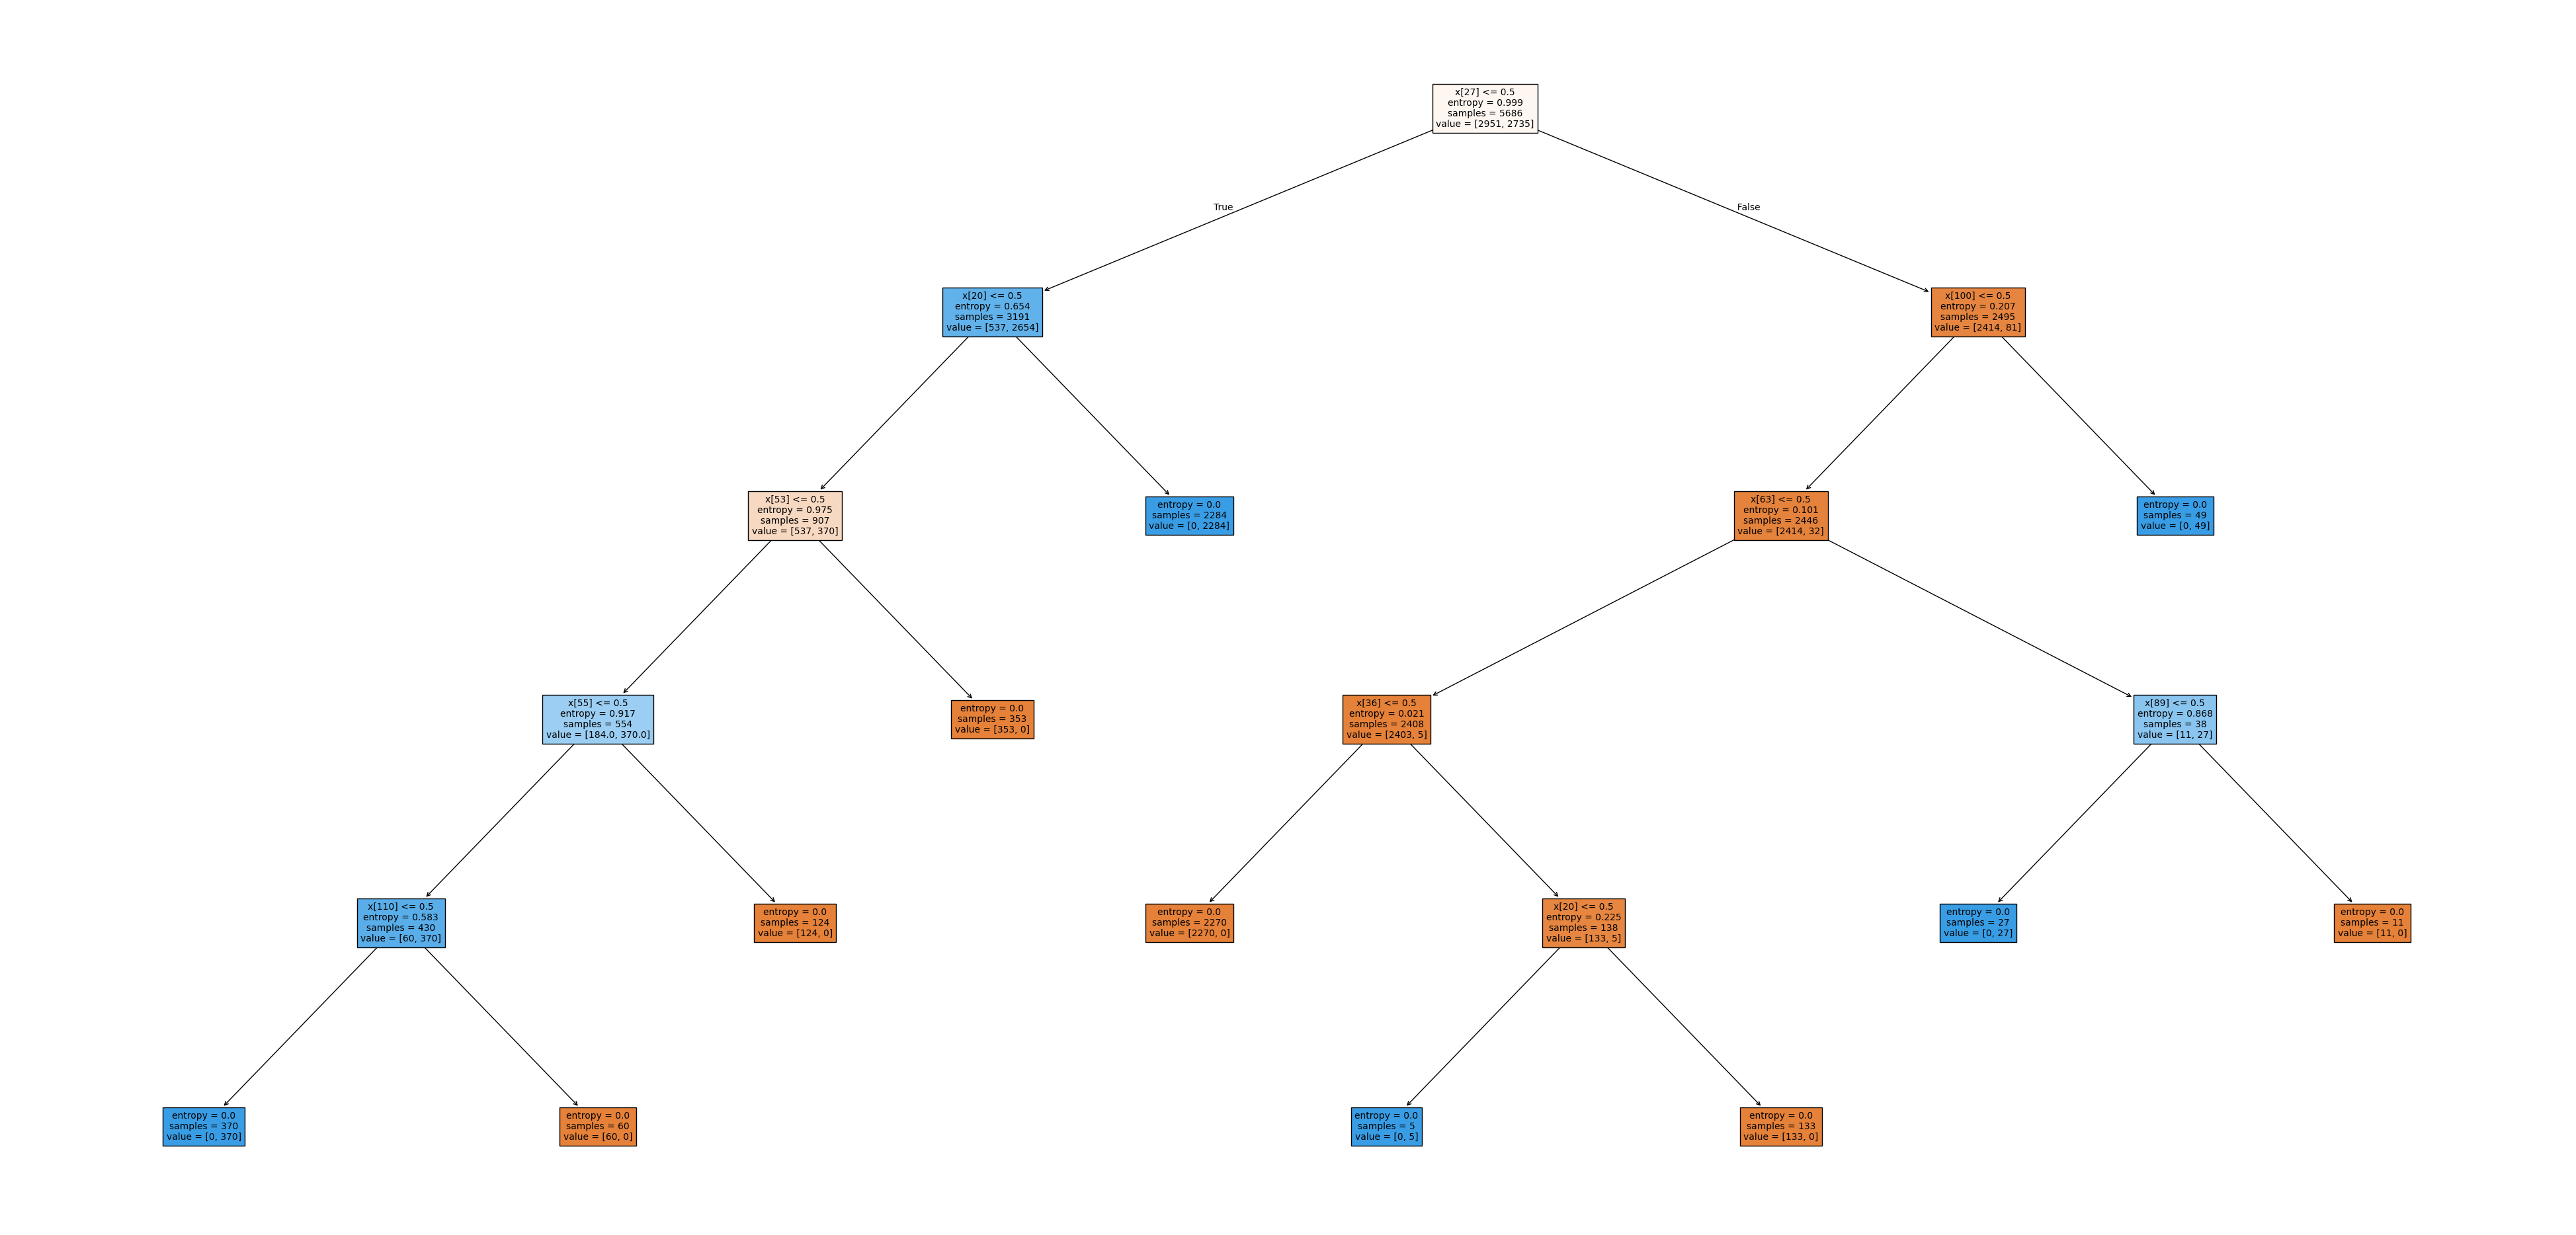

In [10]:
fig, ax = plt.subplots(figsize=(50, 24))
plot_tree(clf_id3, filled=True, fontsize=10)
plt.savefig("id3_tree.png", dpi=100)
plt.show()


Câu 8

In [11]:
print("Bùi Hoàn Duy - 6351071012")

clf_cart = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)
cart_acc = accuracy_score(y_test, cart_pred)

print("CART Accuracy:", cart_acc)
print(classification_report(y_test, cart_pred))


Bùi Hoàn Duy - 6351071012
CART Accuracy: 1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



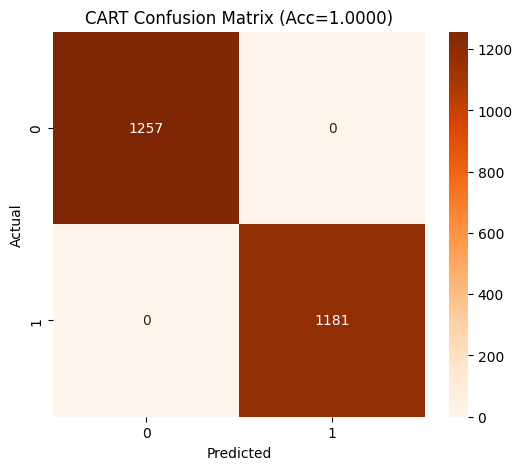

In [12]:
cm = confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title(f"CART Confusion Matrix (Acc={cart_acc:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Câu 9

In [13]:
print("Bùi Hoàn Duy - 6351071012")

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))


Bùi Hoàn Duy - 6351071012
Naive Bayes Accuracy: 0.9643150123051681
              precision    recall  f1-score   support

           e       1.00      0.93      0.96      1257
           p       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



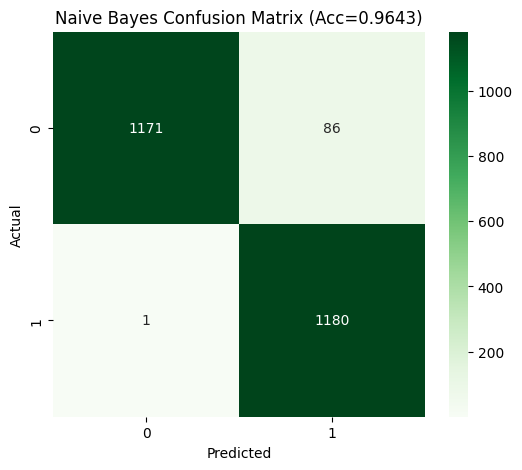

In [14]:
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title(f"Naive Bayes Confusion Matrix (Acc={nb_acc:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Câu 10

Bùi Hoàn Duy - 6351071012

==== SO SÁNH KẾT QUẢ ====
ID3  Accuracy : 1.0000
CART Accuracy : 1.0000
NB   Accuracy : 0.9643


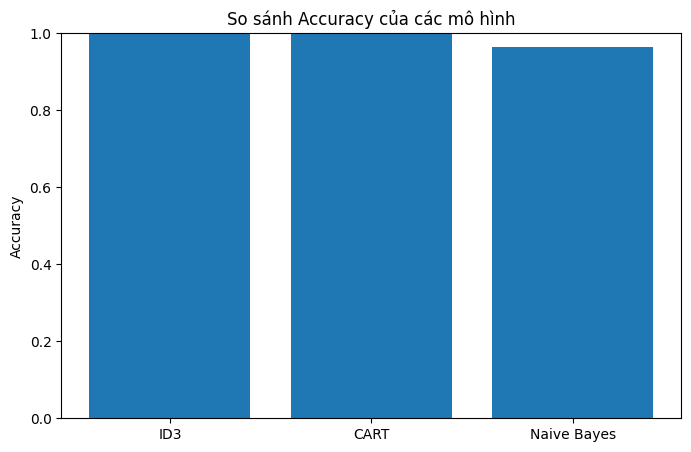

In [15]:
print("Bùi Hoàn Duy - 6351071012")

print("\n==== SO SÁNH KẾT QUẢ ====")
print(f"ID3  Accuracy : {id3_acc:.4f}")
print(f"CART Accuracy : {cart_acc:.4f}")
print(f"NB   Accuracy : {nb_acc:.4f}")

models = ["ID3", "CART", "Naive Bayes"]
acc = [id3_acc, cart_acc, nb_acc]

plt.figure(figsize=(8,5))
plt.bar(models, acc)
plt.title("So sánh Accuracy của các mô hình")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
